## Introduction ##
Earning the title for the best neighborhood in Pittsburgh is difficult, as there are many great areas in the city. In our case, we are searching for the best neighborhood for Penguins to live. We came up with this metic when deciding on a name. We asked Chat GPT initally, but none of the names meshed well with us. We then decided to be named after a simple animal, with the AI giving us "penguins." Thus, both our team name and metric were born. This was our first idea, so we decided to run with it rather than spending a lot of time coming up with ideas.

### Metric

As stated in our introduction, our metric to determine the "best neighborhood" in Pittsburgh is the neighborhood in which a Penguin can thrive in. As a result, we are measuring the capacities of pools, park acres, and census of each neighborhood in order to acurately determine the "best neighborhood." The datasets we are using are "City of Pittsburgh Pools," "Parks," and "2010 Census Tracts."  

In [19]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

Importing in pandas, matplotlib, and geopandas.

## Pool Capacities- Anushka

The data subset I chose to analyze in order to determine which neighborhood is the best for a penguin to live in is the City of Pittsburgh Pools. The "best neighborhood" is the neighborhood with the pool that holds the greatest capacity. 

In [57]:
data = pd.read_csv('PittsburghSwimming.csv', index_col="neighborhood")
data.head()

_id          id                  name        type  retired  \
neighborhood                                                                    
Bedford Dwellings    1   899591542                 Ammon        Pool      NaN   
Banksville           2  1003800828            Banksville        Pool      NaN   
Beechview            3  1688544652  Beechview Spray Park  Spray Park      NaN   
Bloomfield           4  1533382756            Bloomfield        Pool      NaN   
Hazelwood            5  1287441950    Burgwin Spray Park  Spray Park      NaN   

                                           water_source  capacity  \
neighborhood                                                        
Bedford Dwellings  Pittsburgh Water and Sewer Authority  538000.0   
Banksville                  Pennsylvania American Water  166320.0   
Beechview                   Pennsylvania American Water       NaN   
Bloomfield         Pittsburgh Water and Sewer Authority  335000.0   
Hazelwood          Pittsburgh Water and Sewer Authority       NaN   

                                                               image  \
neighborhood                                                           
Bedford Dwellings  https://tools.wprdc.org/images/pittsburgh/pool...   
Banksville         https://tools.wprdc.org/images/pittsburgh/pool...   
Beechview          https://tools.wprdc.org/images/pittsburgh/pool...   
Bloomfield         https://tools.wprdc.org/images/pittsburgh/pool...   
Hazelwood          https://tools.wprdc.org/images/pittsburgh/pool...   

                   council_district  ward        tract  public_works_division  \
neighborhood                                                                    
Bedford Dwellings                 6     5  42003050900                      3   
Banksville                        2    20  42003202300                      5   
Beechview                         4    19  42003191600                      5   
Bloomfield                        7     8  42003080200                      2   
Hazelwood                         5    15  42003562300                      3   

                   pli_division  police_zone fire_zone   latitude  longitude  
neighborhood                                                                  
Bedford Dwellings             5            2       2-5  40.448728 -79.978329  
Banksville                   20            6       4-9  40.414766 -80.040555  
Beechview                    19            6      4-28  40.414997 -80.019173  
Bloomfield                    8            5       3-1  40.461997 -79.953313  
Hazelwood                    15            4      2-13  40.405073 -79.936899

I have read in the CSV file, and made the indexed collumn "neighborhood" in order to display each neighborhood's data. 

In [4]:
pivoted_data = data.pivot_table(index="neighborhood", columns="type", values="capacity")
pivoted_data

type                     Pool
neighborhood                 
Allegheny Center     271000.0
Banksville           166320.0
Bedford Dwellings    538000.0
Bloomfield           335000.0
Brighton Heights     205800.0
Brookline            417657.0
Carrick              224100.0
Greenfield           195000.0
Highland Park        560242.0
Homewood South       171075.0
Lincoln Place         18000.0
Mount Washington     356000.0
Perry North          205800.0
Polish Hill          215451.0
Sheraden             278000.0
South Side Flats     156400.0
Squirrel Hill South  187600.0
Westwood             156840.0

In order to simplify the information, I pivoted the data by keeping the neighborhoods as the index, and the capacities of each neighborhood's pool are the "values" that are shown.  

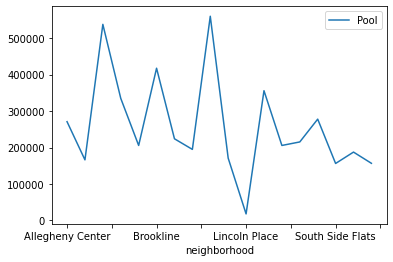

In [6]:
pivoted_data.plot()
plt.legend(bbox_to_anchor=(1,1))

I plotted the pivoted data. There are high sharp peaks that indicate a high pool capacity around 500,000; however, only a few neighborhoods are labeled on the graph so it is difficult to accurately match up the capacity amount to the correct neighborhood. 

In [8]:
pivoted_data.max()

type
Pool    560242.0
dtype: float64

I discovered that the maxium capacity pool is 560,242.  

In [9]:
for neighborhood in pivoted_data.index:
    for capacity in pivoted_data.columns:
        if 560242.0 == pivoted_data.loc[neighborhood, capacity]:
            print("Neighborhood:", neighborhood)
        else:
            break

Neighborhood: Highland Park


I obtained the specific neighborhood from my index and column with the capacity of 560242.0. As a result, Highland Park possess a capacity of 560242. 

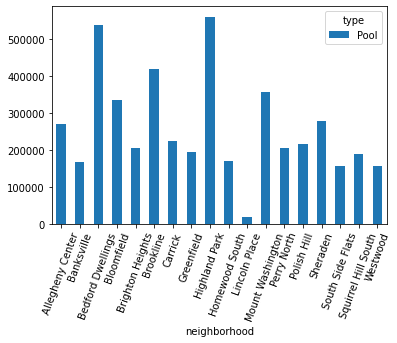

In [10]:
pivoted_data.plot.bar(rot = 70)

I plotted this bar graph to verify that the neghborhood Highland Park has the swimming pool that possesses the highest capacity.

In [21]:
capacity_data = data.groupby("neighborhood").sum()['capacity']
capacity_data.sort_values(ascending=False)

neighborhood
Highland Park               560242.0
Bedford Dwellings           538000.0
Brookline                   417657.0
Mount Washington            356000.0
Bloomfield                  335000.0
South Side Flats            312800.0
Sheraden                    278000.0
Allegheny Center            271000.0
Carrick                     224100.0
Polish Hill                 215451.0
Brighton Heights            205800.0
Perry North                 205800.0
Greenfield                  195000.0
Squirrel Hill South         187600.0
Homewood South              171075.0
Banksville                  166320.0
Westwood                    156840.0
Lincoln Place                18000.0
Lincoln-Lemington-Belmar         0.0
Hazelwood                        0.0
Shadyside                        0.0
East Hills                       0.0
Beltzhoover                      0.0
South Side Slopes                0.0
Beechview                        0.0
Troy Hill                        0.0
Name: capacity, dtype: fl

I created a new dataset to group the capacity of each pool by their neighborhood. The capacity is sorted in descending order, further confirming that Highland Park has the highest capacity. 

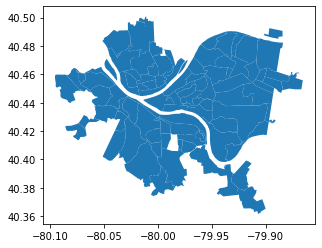

In [6]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot()

I was able to create a map of all the pittsburgh neighborhoods using its shapefile. 

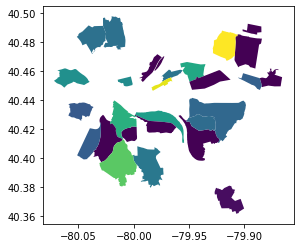

In [7]:
capacity_map = neighborhoods.merge(capacity_data, how='left', left_on='hood', right_on='neighborhood')
capacity_map.plot(column='capacity')

I merged the Pittsburgh neighborhood dataframe with the capacity dataframe and plotted it in order to create a choropleth map of the joined dataframes. 

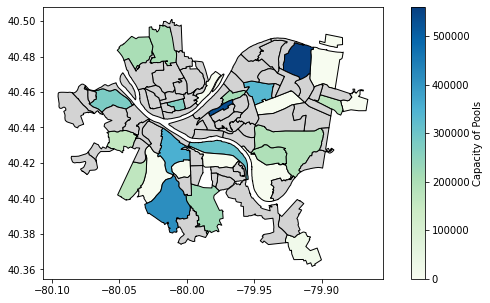

In [8]:
capacity_map.plot(column='capacity', 
               cmap='GnBu',              
               edgecolor="black",        
               legend=True,              
               legend_kwds={'label': "Capacity of Pools"}, 
               figsize=(10, 5),        
               missing_kwds={"color": "lightgrey"} 
               )

I made the choropleth map a set of parameters in order to read the information and organize the map correctly. The darker shades correspond to pools with higher capacities while the gray shades correlate to irrelevant (no data) neighborhoods. 

Therefore, my data-driven analysis of the City of Pittsburgh Pools subset demonstrates that the best neighborhood for a penguin to live in is Highland Park because it possess the highest capacity pool of 560,242. 

# Parks - Rin Tena #
The dataset I chose to analyze was the "Parks" dataset in attempts to find the best neighborhood in Pittsburgh for a penguin to live. In this case, the "best neighborhood" will be defined as the neighborhood that provides the most park space for the penguin to forage, find rocks, and wander. 

In [46]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

hoods = pd.read_csv("Neighborhoods.csv")
data = pd.read_csv("parks.csv")
data.head()

_id  objectid_1  objectid   acreage           sqft          final_cat  \
0  9373        1202      36.0  0.959034   41775.367101  Neighborhood Park   
1  9374        1203     198.0  2.060117   89738.347520  Neighborhood Park   
2  9375        1204     158.0  0.468682   20415.724875  Neighborhood Park   
3  9376        1205      72.0  1.955430   85178.182207  Neighborhood Park   
4  9377        1206      87.0  5.108070  222506.623799  Neighborhood Park   

  type  sector         origpkname                       updatepknm  ...  \
0   NP    15.0  Cliffside Parklet               August Wilson Park  ...   
1   NP     2.0        Young Field                 Young Field Park  ...   
2   NP     8.0       Revenue Park  Roland Lockridge Community Park  ...   
3   NP    12.0    Friendship Park                  Friendship Park  ...   
4   NP    12.0   Heths Playground                      Heth's Park  ...   

                               globalid     created_user  \
0  764d9a2f-719c-49c2-b747-8f276149bf04  pgh.dcp.allisot   
1  9b969f67-1f2e-4f4b-8556-e4ac49ca208e  pgh.dcp.allisot   
2  44bbbdf5-c2db-451c-b880-9251b8211455  pgh.dcp.allisot   
3  f95cbafc-dcd8-493f-8b98-89745c6434ca  pgh.dcp.allisot   
4  a6a4ac92-5a00-4af5-9f11-716e51079fea  pgh.dcp.allisot   

                       created_date last_edited_user  \
0  2023-08-02T14:10:28.845000+00:00  pgh.dcp.allisot   
1  2023-08-02T14:10:28.845000+00:00  pgh.dcp.allisot   
2  2023-08-02T14:10:28.845000+00:00  pgh.dcp.allisot   
3  2023-08-02T14:10:28.845000+00:00  pgh.dcp.allisot   
4  2023-08-02T14:10:28.845000+00:00  pgh.dcp.allisot   

                   last_edited_date maintenanceresponsibility    dpw_ac  \
0  2023-08-02T14:10:28.845000+00:00          Parks - Schenley  0.959034   
1  2023-08-02T14:10:28.845000+00:00         Parks - Riverview  2.060117   
2  2023-08-02T14:10:28.845000+00:00             Parks - Frick  0.468682   
3  2023-08-02T14:10:28.845000+00:00          Parks - Highland  1.955430   
4  2023-08-02T14:10:28.845000+00:00          Parks - Highland  5.108070   

                             globalid_1    shape_area  shape_length  
0  f781af9c-9ec2-4b5e-b5c5-9cc21608635c   6709.199219    390.397012  
1  659c4c55-50fc-4883-8606-76f029fcca47  14423.417969    511.980181  
2  04e61cab-bea6-47dd-964a-0723197726cf   3273.722656    236.488235  
3  22563a68-61d3-46f3-9d5c-4558ee12be1f  13686.265625    760.982871  
4  b5b34833-e1d5-430f-afcc-40a1670d545d  35767.898438    875.156997  

[5 rows x 23 columns]

Importing Pandas and checking to see the parks.csv was properly downloaded. 

In [10]:
#sort data by the park name and add up each acreage
acre = data.groupby("updatepknm", as_index =False)['acreage'].sum().sort_values(['acreage'],ascending=False)
acre['acreage']=acre['acreage'].astype(object)
#Only save the data from the top 5 parks
acre = acre.head()
print(acre)

         updatepknm     acreage
93       Hays Woods  637.409429
81       Frick Park  606.639071
171   Schenley Park  434.082623
99    Highland Park  377.910577
165  Riverview Park  258.604289


Sorting the data by park name and acreage. This shows the top 5 parks with the most area. 

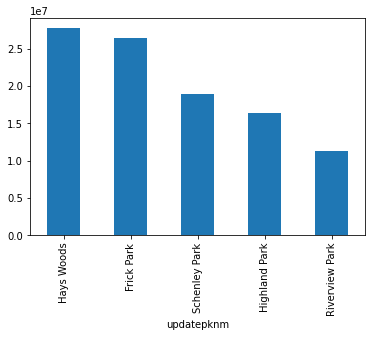

In [11]:
#filter by square feet of park and print top five parks
park_size = data.pivot(columns="updatepknm", values="sqft").sum()
all_park_size = park_size.sort_values(ascending=False)
park_size = all_park_size.head()
park_size.plot(kind="bar")

The five parks with the most acreage are Hays Woods, Frick Park, Schenley Park, Highland Park, and Riverview Park respectively. Now, let's see which neighborhoods corrilate with these parks. 

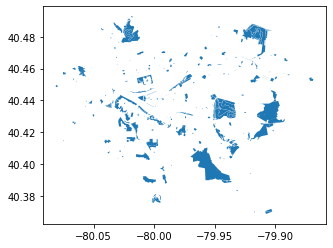

In [12]:
parks = geopandas.read_file("pghMaps/PGHWebParks.shp")
parks.plot()

I loaded in the map of the parks and ensured it was working by plotting it. 

In [13]:
#merge parks and acre
colored = parks.merge(acre, how='left', left_on='updatepknm', right_on='updatepknm')
colored[['updatepknm','sqft','geometry']].head()

updatepknm           sqft  \
0               August Wilson Park   41775.367101   
1                 Young Field Park   89738.347520   
2  Roland Lockridge Community Park   20415.724875   
3                  Friendship Park   85178.182207   
4                      Heth's Park  222506.623799   

                                            geometry  
0  POLYGON ((-79.98614 40.44665, -79.98613 40.446...  
1  POLYGON ((-80.03313 40.47289, -80.03314 40.473...  
2  POLYGON ((-79.92039 40.39402, -79.92047 40.393...  
3  POLYGON ((-79.94539 40.46264, -79.94486 40.462...  
4  POLYGON ((-79.92675 40.47832, -79.92722 40.477...

Here are the parks and shapefile being combined.

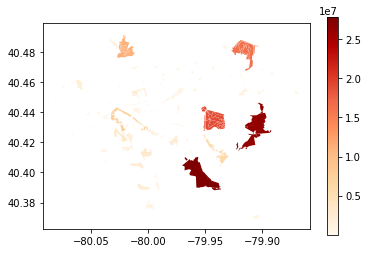

In [14]:
#map of all the parks in pittsburgh
colored.plot(column='sqft',cmap='OrRd', legend=True)

As you can see, the map is incomplete, as there are not parks all over Pittsburgh. If we compare this map with the map of neighborhoods, however, we can see which areas these parks belong to. We know from before that the plot with the largest area of land is Hays Woods, so perhaps there is a neighborhood by the same name. 

In [15]:
#hoodNames = hoods.pivot(columns="hood", values="_id").sum()
hoodNames = hoods.groupby("hood", as_index =False)['hood_no'].sum().sort_values(['hood_no'],ascending=False)
print(hoodNames)

                   hood  hood_no
89              Windgap       90
88             Westwood       89
87         West Oakland       88
86             West End       87
85  Upper Lawrenceville       86
..                  ...      ...
4     Arlington Heights        5
3             Arlington        4
2             Allentown        3
1        Allegheny West        2
0      Allegheny Center        1

[90 rows x 2 columns]


Pivoting the data so that the neighborhood names are shown. 

In [9]:
#Search for the neighborhood by the park
search_value = 'Hays'
result = hoodNames[hoodNames['hood'] == search_value]
print(result)

    hood  hood_no
37  Hays       38


The neighborhood Hays is closest to the largest park in pittsburgh: Hays Woods.

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
hoodMap = neighborhoods.merge(hoodNames, how='left', left_on='hood', right_on='hood')
hoodMap[['hood','hood','geometry']].head()

hood              hood  \
0   Central Oakland   Central Oakland   
1     North Oakland     North Oakland   
2      West Oakland      West Oakland   
3  Crawford-Roberts  Crawford-Roberts   
4    Strip District    Strip District   

                                            geometry  
0  POLYGON ((-79.95304 40.44203, -79.95302 40.442...  
1  POLYGON ((-79.95455 40.45882, -79.95427 40.458...  
2  POLYGON ((-79.96230 40.44294, -79.96220 40.442...  
3  POLYGON ((-79.98275 40.44641, -79.98273 40.446...  
4  POLYGON ((-79.97494 40.45629, -79.97484 40.456...

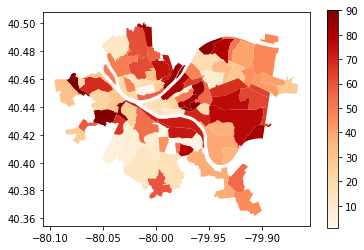

In [13]:
hoodMap.plot(column='hood_no',cmap='OrRd', legend=True)

As you can see, the Hays neighborhood is where the Hays Woods park is. The Best neighborhood in Pittsburgh for a penguin to live is Hays according to this data set because it contains the biggest Park in the city, which as an area of 637.4 acres. 

## **2010 Census- Together**

The final dataset we chose to analyze together in order to determine which neighborhood is the best for a penguin to live in is the 2010 census tract of Pittsburgh neighborhoods. The "best neighborhood" is the one which possess the largest space for a penguin to roam around. 

In [48]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

We imported pandas, matplotlib, and geopandas.

In [49]:
census = pd.read_csv('2010CensusTracts.csv', index_col="hood")
census.head()

_id  objectid  statefp10  countyfp10  tractce10  \
hood                                                                          
Central Oakland           10759         1         42           3      40500   
North Oakland             10760         2         42           3      40400   
West Oakland              10761         3         42           3      40200   
Crawford-Roberts          10762         4         42           3      30500   
Lincoln-Lemington-Belmar  10763         5         42           3     980000   

                          blkgrpce10       geoid10     namelsad10 mtfcc10  \
hood                                                                        
Central Oakland                    1  420030405001  Block Group 1   G5030   
North Oakland                      1  420030404001  Block Group 1   G5030   
West Oakland                       2  420030402002  Block Group 2   G5030   
Crawford-Roberts                   2  420030305002  Block Group 2   G5030   
Lincoln-Lemington-Belmar           1  420039800001  Block Group 1   G5030   

                         funcstat10  ...  objectid_1  tractce10_1  \
hood                                 ...                            
Central Oakland                   S  ...           7        40500   
North Oakland                     S  ...           6        40400   
West Oakland                      S  ...           5        40200   
Crawford-Roberts                  S  ...           4        30500   
Lincoln-Lemington-Belmar          S  ...         125       980000   

                          cnt_tractce10  sum_lowmod2018  sum_lowmoduniv  \
hood                                                                      
Central Oakland                       2            2775            2985   
North Oakland                         2            1365            2020   
West Oakland                          2            1070            1290   
Crawford-Roberts                      2            1635            2130   
Lincoln-Lemington-Belmar              1              65             220   

                          lowmodperct  lowmodpercanno  cdbg2018    shape_area  \
hood                                                                            
Central Oakland             92.964824           92.96       Yes  5.079492e+06   
North Oakland               67.574257           67.57       Yes  2.105489e+06   
West Oakland                82.945736           82.94       Yes  5.998649e+06   
Crawford-Roberts            76.760563           76.76       Yes  7.203631e+06   
Lincoln-Lemington-Belmar    29.545455           29.54        No  7.764866e+06   

                          shape_length  
hood                                    
Central Oakland           10442.036450  
North Oakland              6609.688123  
West Oakland              18280.484081  
Crawford-Roberts          15694.771444  
Lincoln-Lemington-Belmar  13581.875089  

[5 rows x 31 columns]

We downloaded, read in the CSV file, and made the indexed column "hood" to display each neighborhood's data. 

In [31]:
pivoted_acres = census.pivot_table(index="hood", values="acres")
sorting = pivoted_acres.sort_values(by="acres", ascending=False)
sorting

acres
hood                         
Squirrel Hill South  1717.485
Brookline            1338.669
Carrick              1075.670
Hazelwood            1017.805
Beechview             938.804
...                       ...
Homewood West         127.819
Regent Square         123.682
Bedford Dwellings     115.252
Allegheny West         90.841
Friendship             68.297

[79 rows x 1 columns]

We pivoted our data by using the neighborhoods as the index and its quantity of acres as the values. In order to organize the data, we sorted the acres from the greatest to least amount. Squirrel Hill South has the greatest number of acres available.  

In [32]:
pivoted_sqmiles = census.pivot_table(index="hood", values="sqmiles")
sorting = pivoted_sqmiles.sort_values(by="sqmiles", ascending=False)
sorting

sqmiles
hood                        
Squirrel Hill South    2.671
Brookline              2.082
Carrick                1.673
Hazelwood              1.583
Beechview              1.460
...                      ...
Homewood West          0.199
Regent Square          0.192
Bedford Dwellings      0.179
Allegheny West         0.141
Friendship             0.106

[79 rows x 1 columns]

We pivoted our data by using the neighborhoods as the index and its square miles as the values. We sorted the square miles in descending order. Squirrel Hill South has the greatest number of square miles.  

In [33]:
pivoted_shape_area = census.pivot_table(index="hood", values="shape_area")
sorting = pivoted_shape_area.sort_values(by="shape_area", ascending=False)
sorting

shape_area
hood                           
Hazelwood          5.281342e+07
Windgap            4.212670e+07
Westwood           2.948787e+07
Lincoln Place      2.741278e+07
Banksville         2.699251e+07
...                         ...
Garfield           4.250387e+06
Central Oakland    3.921498e+06
Bloomfield         3.914821e+06
Central Northside  3.609780e+06
Friendship         2.960456e+06

[79 rows x 1 columns]

We pivoted our data by using the neighborhoods as the index and its area as the values. We sorted the area in descending order. Hazelwood has the greatest area. 

In [34]:
pivoted_shape_length = census.pivot_table(index="hood", values="shape_length")
sorting = pivoted_shape_length.sort_values(by="shape_length", ascending=False)
sorting

shape_length
hood                         
Hazelwood        59285.806755
Windgap          36403.199308
Westwood         32824.115522
Troy Hill        29583.620672
Oakwood          28692.519333
...                       ...
Homewood West    10086.394631
Bloomfield        9599.937577
Garfield          9430.232170
Central Oakland   9237.844869
Friendship        7707.157832

[79 rows x 1 columns]

We pivoted our data by using the neighborhoods as the index and its length as the values. We sorted the length in descending order. Hazelwood has the greatest length. 

In [35]:
pivoted_census = census.pivot_table(index="hood", values=["acres", "sqmiles", "shape_area", "shape_length"])
sorting = pivoted_census.sort_values(by= ["acres", "sqmiles", "shape_area", "shape_length"], ascending=False)
sorting

acres    shape_area  shape_length  sqmiles
hood                                                              
Squirrel Hill South  1717.485  1.489448e+07  19258.367382    2.671
Brookline            1338.669  1.449720e+07  19419.214771    2.082
Carrick              1075.670  1.554573e+07  23258.623583    1.673
Hazelwood            1017.805  5.281342e+07  59285.806755    1.583
Beechview             938.804  2.035204e+07  22046.326835    1.460
...                       ...           ...           ...      ...
Homewood West         127.819  5.548059e+06  10086.394631    0.199
Regent Square         123.682  5.360984e+06  16004.734291    0.192
Bedford Dwellings     115.252  4.997845e+06  14216.964709    0.179
Allegheny West         90.841  9.770255e+06  14096.961772    0.141
Friendship             68.297  2.960456e+06   7707.157832    0.106

[79 rows x 4 columns]

We created a new pivoted dataset to illustrate the information we discovered in a more organized format. Based on the data, Squirrel Hill South is the "best neighborhood" for a penguin to reside in because it contains the most space. 

In [36]:
neighborhood = census.groupby("hood", as_index =False)['acres'].sum().sort_values(['acres'],ascending=False)
neighborhood.head()

acres
66  8587.425
10  5354.676
12  3227.010
37  3134.724
57  2960.520

In [24]:
#Merging the map with the data
census = geopandas.read_file("CensusShape/2010_Census_Tracts.shp") # read in the shapefile
censusMerge = census.merge(neighborhood, how='left', left_on='hood', right_on='hood')
censusMerge[['hood','sqmiles','geometry']].head()

hood  sqmiles  \
0           Central Oakland    0.281   
1             North Oakland    0.499   
2              West Oakland    0.215   
3          Crawford-Roberts    0.258   
4  Lincoln-Lemington-Belmar    0.280   

                                            geometry  
0  POLYGON ((-79.95304 40.44203, -79.95302 40.442...  
1  POLYGON ((-79.94727 40.44703, -79.94716 40.446...  
2  POLYGON ((-79.96230 40.44294, -79.96220 40.442...  
3  POLYGON ((-79.98275 40.44641, -79.98273 40.446...  
4  POLYGON ((-79.88460 40.49066, -79.88451 40.486...

We used geopandas to plot the census data on a map. 

In [25]:
censusMerge.plot(column='sqmiles',cmap='OrRd', legend=True)

We colored the census map to visualize the areas of Pittsburgh that fit our criteria the best. The neighborhoods with the most space are highlighted with the darker colors on the map. 

According to this metric of area in each neighborhood, the best neighborhood for a penguin to live in is Squirrel Hill South. 

## Discovering the "best neighborhood"

In [59]:
capacity_data = data.groupby("neighborhood").sum()['capacity']
sorted_capacity_data = capacity_data.sort_values(ascending=False)
sorted_capacity_data.head(10)

neighborhood
Highland Park        560242.0
Bedford Dwellings    538000.0
Brookline            417657.0
Mount Washington     356000.0
Bloomfield           335000.0
South Side Flats     312800.0
Sheraden             278000.0
Allegheny Center     271000.0
Carrick              224100.0
Polish Hill          215451.0
Name: capacity, dtype: float64

In [47]:
acre = data.groupby("updatepknm", as_index =False)['acreage'].sum().sort_values(['acreage'],ascending=False)
acre['acreage']=acre['acreage'].astype(object)
acre.head(10)

updatepknm     acreage
93                   Hays Woods  637.409429
81                   Frick Park  606.639071
171               Schenley Park  434.082623
99                Highland Park  377.910577
165              Riverview Park  258.604289
64   Emerald View Regional Park  171.817975
95               Hazelwood Park  139.415652
173            Seldom Seen Park   80.212657
131               McKinley Park   77.832554
3             Allegheny Commons   61.385906

In [52]:
sorting = pivoted_census.sort_values(by= ["acres", "sqmiles", "shape_area", "shape_length"], ascending=False)
sorting.head(10)

acres    shape_area  shape_length  sqmiles
hood                                                                   
Squirrel Hill South       1717.485  1.489448e+07  19258.367382    2.671
Brookline                 1338.669  1.449720e+07  19419.214771    2.082
Carrick                   1075.670  1.554573e+07  23258.623583    1.673
Hazelwood                 1017.805  5.281342e+07  59285.806755    1.583
Beechview                  938.804  2.035204e+07  22046.326835    1.460
Squirrel Hill North        785.948  1.135913e+07  14932.144807    1.222
Lincoln-Lemington-Belmar   783.681  1.261502e+07  18249.723970    1.219
Perry North                779.088  1.124402e+07  23868.221135    1.212
Highland Park              747.691  1.080660e+07  17123.923318    1.163
Mount Washington           732.495  7.941314e+06  16294.616493    1.139

We displayed the first 10 rows of all three simplified subsets. 

Highland Park ranks 1st in the pool capacities dataset, 4th in the parks dataset, and 9th in census dataset. Although Hazelwood ranks higher than Highland Park in the census dataset, Highland Park is classified higher in both the pool capacities and park datasets. 

Therefore, Highland park in the "best neighborhood" for a penguin to live in because it has the highest capacity pool, is one of the largest neighborhoods, and contains one of the largest parks for a penguin to live in.

## Conclusion

Anushka - Based on my subset, I discovered that Highland Park has the pool with the greatest capacity for a penguin to swim in. Additionally, since we worked on the third dataset together, Squirrel Hill South was actually the "best neighborhood" because it possessed the greatest size for a penguin to roam around in. However, our determination of the “best neighborhood” is the same as my personal favorite neighborhood because I worked on the pool capacity dataset individually, which is why Highland Park is the "best neighborhood".

Rin - The subset I worked on was measuring the largest parks near the neighborhoods, so that penguins could go out to forage for nesting materials and rocks. The neighborhood that best fit this metric turned out to be Hays. Anushka and I worked together on the next dataset, which looked at the size of the neighborhoods. This resulted in Squirrel Hill South being the best neighborhood to live in. All together, however, Highland Park was determined to be the best neighborhood since it is the neighborhood that sits fairly high on all of the rankings put together. 

## Introduction ##
Earning the title for the best neighborhood in Pittsburgh is difficult, as there are many great areas in the city. In our case, we are searching for the best neighborhood for Penguins to live. We came up with this metic when deciding on a name. We asked Chat GPT initally, but none of the names meshed well with us. We then decided to be named after a simple animal, with the AI giving us "penguins." Thus, both our team name and metric were born. This was our first idea, so we decided to run with it rather than spending a lot of time coming up with ideas.